In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib
import scipy.stats as spst

pd.set_option('display.max_columns',None)

In [63]:
path = '../../git_ignore_file/Dataset'

In [64]:
train = pd.read_csv(f'{path}/dacon_stress_prediction/train.csv')
test = pd.read_csv(f'{path}/dacon_stress_prediction/test.csv')
submission = pd.read_csv(f'{path}/dacon_stress_prediction/sample_submission.csv')

In [65]:
train_numeric = pd.read_csv('./train_numeric.csv')

In [66]:
train_numeric

,gender,age,height,weight,cholesterol,systolic_blood_pressure,diastolic_blood_pressure,glucose,bone_density,mean_working,stress_score,grade,pulse_pressure,pulse_pressure_normal,is_medical_history,is_family_history,sleep_pattern_label,edu_level_label,smoke_status_label
0,0,72,161.49,58.47,279.84,165,100,143.35,0.87,0.0,0.63,70,65,1,1,1,-1,2,1
1,1,88,179.87,77.60,257.37,178,111,146.94,0.07,0.0,0.83,80,67,1,0,1,0,3,1
2,1,47,182.47,89.93,226.66,134,95,142.61,1.18,9.0,0.70,40,39,0,0,0,0,1,1
3,1,69,185.78,68.63,206.74,158,92,137.26,0.48,0.0,0.17,60,66,1,1,0,1,3,1
4,0,81,164.63,71.53,255.92,171,116,129.37,0.34,0.0,0.36,80,55,0,1,1,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,87,174.43,77.14,233.31,176,111,134.71,0.20,0.0,0.02,80,65,1,0,0,1,0,0
2996,1,25,171.44,51.67,196.89,143,86,111.91,1.75,9.0,0.16,20,57,0,0,0,0,1,2
2997,0,54,162.13,55.54,210.52,164,91,136.47,0.80,9.0,0.16,50,73,1,0,0,0,0,2
2998,1,70,181.32,82.20,234.10,182,91,144.89,0.58,0.0,0.18,70,91,1,0,0,1,1,0


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        3000 non-null   object 
 1   gender                    3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   height                    3000 non-null   float64
 4   weight                    3000 non-null   float64
 5   cholesterol               3000 non-null   float64
 6   systolic_blood_pressure   3000 non-null   int64  
 7   diastolic_blood_pressure  3000 non-null   int64  
 8   glucose                   3000 non-null   float64
 9   bone_density              3000 non-null   float64
 10  activity                  3000 non-null   object 
 11  smoke_status              3000 non-null   object 
 12  medical_history           1711 non-null   object 
 13  family_medical_history    1514 non-null   object 
 14  sleep_pa

In [68]:
#임시 모델링
# train_tmp = train.drop(['ID','age','pulse_pressure','pulse_pressure_normal','activity','smoke_status','medical_history','family_medical_history','sleep_pattern',
#                         'edu_level'],axis=1)
# train_tmp.info()

In [69]:
model_score = {}
model_score_scale = {}

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import lightgbm
import xgboost
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import sklearn.model_selection
from sklearn.metrics import mean_absolute_error
import gc
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings 
warnings.filterwarnings('ignore')

In [71]:
target = 'stress_score'

x = train_numeric.drop(target, axis=1)
y = train_numeric.loc[:, target]

In [72]:
#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [73]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

In [74]:
#modeling
tree_rg = DecisionTreeRegressor()
tree_rg.fit(x_train_s, y_train)
y_pred = tree_rg.predict(x_test_s)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.24
RMSE: 0.34
R² Score: -0.421


In [75]:
#modeling
xgb = xgboost.XGBRegressor()
xgb.fit(x_train_s, y_train)
y_pred = xgb.predict(x_test_s)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 0.21
RMSE: 0.27
R² Score: 0.105


In [76]:
#modeling
lgbm = lightgbm.LGBMRegressor()
lgbm.fit(x_train_s, y_train)
y_pred = lgbm.predict(x_test_s)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1540
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 18
[LightGBM] [Info] Start training from score 0.479914
MAE: 0.22
RMSE: 0.27
R² Score: 0.085


In [77]:
def modelscore(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.3f}")
    return {'MAE':mae, 'RMSE':rmse, 'R^2':r2}

In [95]:
cv_score_result = {}

In [78]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRFRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [79]:
linear = LinearRegression()
linear.fit(x_train_s, y_train)

y_pred = linear.predict(x_test_s)


print('MAE:',mean_absolute_error(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred))
print('R2_score:',r2_score(y_test, y_pred))

MAE: 0.2461388013777916
MAPE: 14019587286608.248
R2_score: -0.00637297578234941


In [96]:
linear = LinearRegression()
linear.fit(x_train, y_train)

y_pred = linear.predict(x_test)

model_score['linear'] = modelscore(y_test,y_pred)
cv_score = cross_val_score(linear, x_train, y_train, cv=10)

print('average score : ',cv_score.mean())
print('std score :',cv_score.std())
cv_score_result['linear'] = cv_score.mean()

MAE: 0.25
RMSE: 0.29
R² Score: -0.006
average score :  -0.01150127772244025
std score : 0.023055196132502388


In [97]:
#modeling
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

model_score['xgb'] = modelscore(y_test,y_pred)

cv_score = cross_val_score(xgb, x_train, y_train, cv=10)

print('average score : ',cv_score.mean())
print('std score :',cv_score.std())
cv_score_result['xgb'] = cv_score.mean()

MAE: 0.21
RMSE: 0.27
R² Score: 0.105
average score :  0.15644907323376428
std score : 0.0788206703026021


In [98]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

model_score['rf']= modelscore(y_test,y_pred)

cv_score = cross_val_score(rf, x_train, y_train, cv=10)

print('average score : ',cv_score.mean())
print('std score :',cv_score.std())
cv_score_result['rf'] = cv_score.mean()

MAE: 0.21
RMSE: 0.25
R² Score: 0.204
average score :  0.23016575900477507
std score : 0.04257609125521393


In [99]:
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)

y_pred = lgbm.predict(x_test)

model_score['lgbm'] = modelscore(y_test,y_pred)

cv_score = cross_val_score(lgbm, x_train, y_train, cv=10)

print('average score : ',cv_score.mean())
print('std score :',cv_score.std())
cv_score_result['lgbm'] = cv_score.mean()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1529
[LightGBM] [Info] Number of data points in the train set: 2100, number of used features: 18
[LightGBM] [Info] Start training from score 0.479914
MAE: 0.22
RMSE: 0.27
R² Score: 0.115
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1522
[LightGBM] [Info] Number of data points in the train set: 1890, number of used features: 18
[LightGBM] [Info] Start training from score 0.476804
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 1890, number of used featur

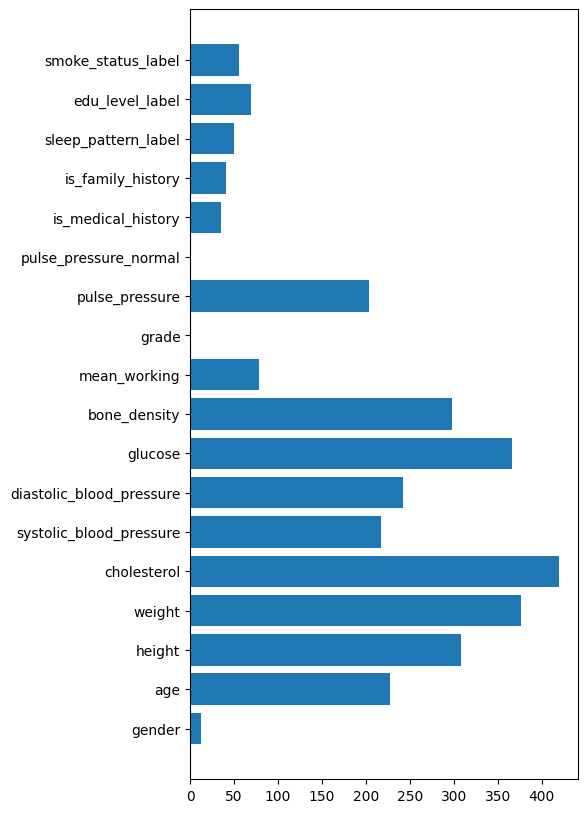

In [86]:
# 변수 중요도
plt.figure(figsize=(5,10))
plt.barh(y=list(x), width=lgbm.feature_importances_)
plt.show()

In [100]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

model_score['knn'] = modelscore(y_test, y_pred)

cv_score = cross_val_score(knn, x_train, y_train, cv=10)

print('average score : ',cv_score.mean())
print('std score :',cv_score.std())
cv_score_result['knn'] = cv_score.mean()

MAE: 0.25
RMSE: 0.30
R² Score: -0.109
average score :  -0.14122310410441113
std score : 0.08087955935503968


In [101]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(x_train, y_train)

y_pred = cat.predict(x_test)

model_score['cat'] = modelscore(y_test,y_pred)


cv_score = cross_val_score(cat, x_train, y_train, cv=10)

print('average score : ',cv_score.mean())
print('std score :',cv_score.std())
cv_score_result['cat'] = cv_score.mean()

Learning rate set to 0.046035
0:	learn: 0.2893588	total: 1.09ms	remaining: 1.09s
1:	learn: 0.2889921	total: 1.92ms	remaining: 956ms
2:	learn: 0.2883945	total: 2.64ms	remaining: 878ms
3:	learn: 0.2879919	total: 3.27ms	remaining: 814ms
4:	learn: 0.2874607	total: 3.94ms	remaining: 784ms
5:	learn: 0.2869532	total: 4.7ms	remaining: 779ms
6:	learn: 0.2865131	total: 5.41ms	remaining: 768ms
7:	learn: 0.2861915	total: 6.19ms	remaining: 767ms
8:	learn: 0.2859164	total: 6.87ms	remaining: 757ms
9:	learn: 0.2854212	total: 7.57ms	remaining: 750ms
10:	learn: 0.2850934	total: 8.19ms	remaining: 736ms
11:	learn: 0.2846812	total: 8.84ms	remaining: 728ms
12:	learn: 0.2841938	total: 9.47ms	remaining: 719ms
13:	learn: 0.2838659	total: 10.2ms	remaining: 717ms
14:	learn: 0.2834432	total: 10.8ms	remaining: 707ms
15:	learn: 0.2829929	total: 11.4ms	remaining: 699ms
16:	learn: 0.2826451	total: 11.9ms	remaining: 688ms
17:	learn: 0.2823654	total: 12.5ms	remaining: 680ms
18:	learn: 0.2820698	total: 13ms	remaining: 6

In [88]:
model_score

{'linear': {'MAE': 0.2461331022091127,
  'RMSE': 0.28528233983937806,
  'R^2': -0.0063899166775522875},
 'xgb': {'MAE': 0.2068819860678994,
  'RMSE': 0.2689577838992796,
  'R^2': 0.10549095477667436},
 'rf': {'MAE': 0.2075521111111111,
  'RMSE': 0.2534119041095829,
  'R^2': 0.20590854011987725},
 'lgbm': {'MAE': 0.22045324532839225,
  'RMSE': 0.26752470536791156,
  'R^2': 0.11499792299929956},
 'knn': {'MAE': 0.24933777777777777,
  'RMSE': 0.29943171360280313,
  'R^2': -0.10869500910104013},
 'cat': {'MAE': 0.2157656562835419,
  'RMSE': 0.2629668214750627,
  'R^2': 0.1448970295248725}}

In [102]:
cv_score_result

{'linear': -0.01150127772244025,
 'xgb': 0.15644907323376428,
 'rf': 0.23016575900477507,
 'lgbm': 0.14613223635030848,
 'knn': -0.14122310410441113,
 'cat': 0.19466878780985677}

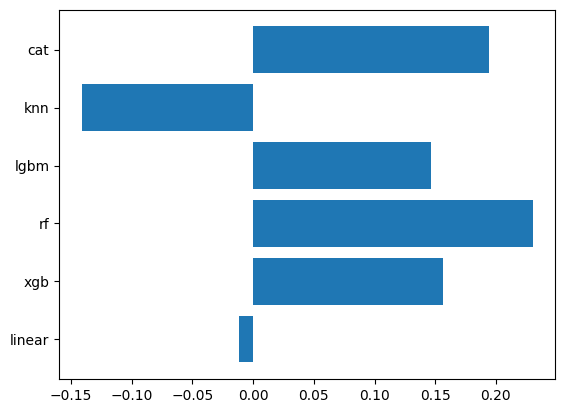

In [103]:
# 성능 시각화 비교
plt.barh(list(cv_score_result.keys()), cv_score_result.values())
plt.show()

In [104]:
# 기본 모델 선언
model_randomF = RandomForestRegressor()

# 파라미터 지정
  # max_depth: range(1, 21)
param = {'max_depth':range(1,51)}
# 모델 선언

model=GridSearchCV(model_randomF, param, cv=5)



model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 51)})

In [105]:
# 최적 파라미터, 예측 최고 성능
# mean_test_score 확인
print('=' * 80)
print(model.cv_results_['mean_test_score'])
# 최적 파라미터
print('최적파라미터:', model.best_params_)
print('-' * 80)
# 최고 성능
print('최고성능:', model.best_score_)
print('=' * 80)

[0.01950866 0.02505021 0.02963572 0.03741225 0.04561947 0.05746132
 0.06905476 0.08904506 0.10230569 0.12716256 0.136828   0.14680587
 0.17004807 0.17798951 0.18252712 0.19134919 0.19215027 0.20172597
 0.20853589 0.20767061 0.20886721 0.21413602 0.21253249 0.20757606
 0.20609278 0.21124048 0.21557256 0.21241419 0.2027114  0.20852202
 0.20823174 0.21647369 0.2097634  0.20711875 0.21169414 0.21083879
 0.20868988 0.21002464 0.20768938 0.21389177 0.21298283 0.20563657
 0.20324784 0.21464023 0.21880934 0.20999487 0.20985523 0.20780724
 0.20546603 0.21513736]
최적파라미터: {'max_depth': 45}
--------------------------------------------------------------------------------
최고성능: 0.2188093434734411


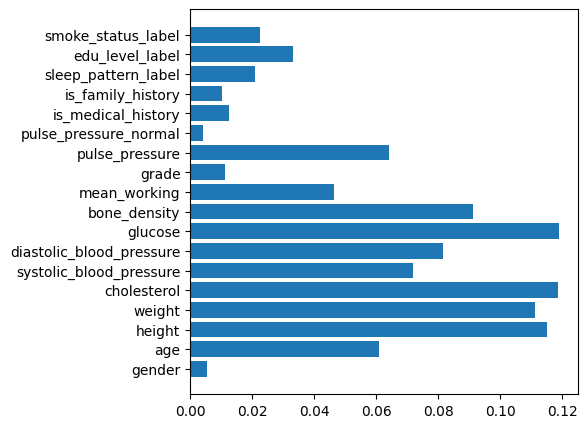

In [106]:
# 변수 중요도
plt.figure(figsize=(5,5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_)
plt.show()

# 시도해 볼 사항
1. family_medical_history, medical_history 등의 변수 One-hot encoding
2. feature_importances 기준 변수 정리
3. 딥러닝 모델 활용